Purpose of this file is to analyze us level data (48 states)

In [1]:
import functions as fns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


In [2]:
# let's begin by testing our data grabbing function first
states_list = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",
]


# creating an empty dataframe where we will be adding sub dfs
main_df = pd.DataFrame()

for state in states_list: 
    '''
    iterate through states list, grab data, and then put into 1 main df
    '''
    df = fns.grab_data_by_state(state=state)
    main_df = pd.concat([main_df, df], axis=0)

print(main_df)

# outputting our data to check if it matches up with the database
main_df.to_csv('data_files/uswtdb_full_dataset.csv', index=False)


File saved only.
File saved only.
File saved only.
File saved only.


C:\Users\aange\AppData\Local\Temp\ipykernel_1788\2423168714.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis=0)


File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.


C:\Users\aange\AppData\Local\Temp\ipykernel_1788\2423168714.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis=0)


File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.


C:\Users\aange\AppData\Local\Temp\ipykernel_1788\2423168714.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis=0)


File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.


C:\Users\aange\AppData\Local\Temp\ipykernel_1788\2423168714.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], axis=0)


File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
File saved only.
      case_id    faa_ors            faa_asn  usgs_pr_id t_state  \
0     3086174  02-280875  2018-WTW-10456-OE         NaN      AK   
1     3032902  02-020096   2009-WTW-3001-OE      1863.0      AK   
2     3033399  02-020097   2022-WTW-2424-OE      1861.0      AK   
3     3032903  02-020100   2009-WTW-3002-OE      1862.0      AK   
4     3071360  02-020098   2009-WTW-6451-OE      1860.0      AK   
...       ...        ...                ...         ...     ...   
1525  3127445  56-062138   2020-WTW-1879-OE         NaN      WY   
1526  3129876  56-062237   2022-WTW-6841-OE         NaN      WY   
1527  3130000  56-062153  2018-WTW-15878-OE         NaN      WY   
1528  3129406  56-062152  2018-WTW-15877-OE         NaN      WY   
1529  3129911  56-062154  2018-WTW-15879-OE         NaN      WY   

                      t_county t_fips                  p_na

<Axes: >

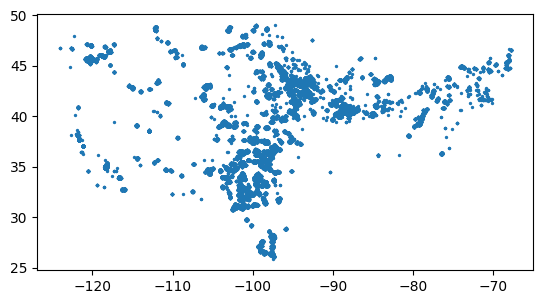

In [3]:
# grabbing and turning data from usa dataset into a gdf
points = gpd.points_from_xy(main_df['xlong'], main_df['ylat'])
gdf = gpd.GeoDataFrame(main_df, geometry=points, crs='EPSG:4326')

# removing any non mainland us states
gdf = gdf[~gdf['t_state'].isin(['AK', 'HI'])]

# setting some params for our datapoints
plt.rcParams['figure.dpi'] = 100

gdf.plot(markersize=2)

In [4]:
# dropping na's related to t_rd
gdf = gdf.dropna(subset=['t_rd', 'p_cap'])

# for when you want to output as a csv file
# gdf.to_csv('uswtdb_usa_data.csv', index=False)

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 69065 entries, 55 to 1443
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   case_id        69065 non-null  int64   
 1   faa_ors        67265 non-null  object  
 2   faa_asn        66773 non-null  object  
 3   usgs_pr_id     34971 non-null  float64 
 4   t_state        69065 non-null  object  
 5   t_county       69065 non-null  object  
 6   t_fips         69065 non-null  object  
 7   p_name         69065 non-null  object  
 8   p_year         69060 non-null  float64 
 9   p_tnum         69065 non-null  int64   
 10  p_cap          69065 non-null  float64 
 11  t_manu         69055 non-null  object  
 12  t_model        68932 non-null  object  
 13  t_cap          69065 non-null  float64 
 14  t_hh           68694 non-null  float64 
 15  t_rd           69065 non-null  float64 
 16  t_rsa          69065 non-null  float64 
 17  t_ttlh         68695 non-nul

we can find information on state id params here
https://www.census.gov/library/reference/code-lists/ansi/ansi-codes-for-states.html

<Axes: >

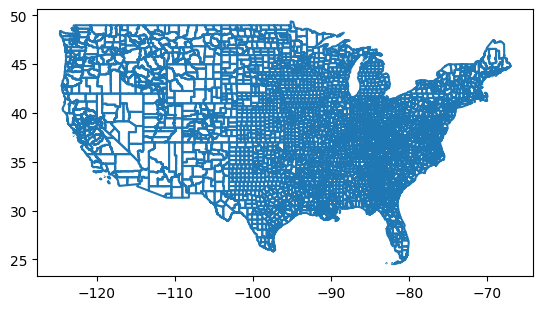

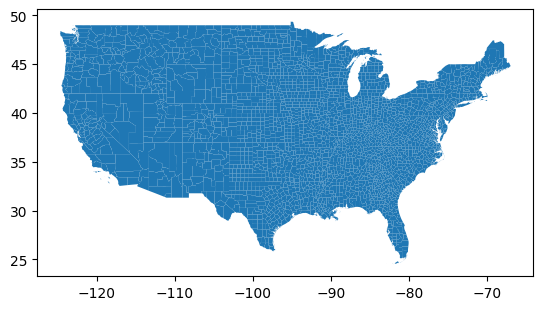

In [5]:
# loading us map into our env now
usa_shapefile = 'shape_files/cb_2018_us_county_500k.shp'

# converting shapefile into a geopandas df
usa_map = gpd.read_file(usa_shapefile)

# remove these entities whether non mainland or territories
non_mainland = ['02', '15', '72', '60', '66', '69', '78']

# removing alaska, puerto rico and hawaii
usa_map = usa_map[~usa_map['STATEFP'].isin(non_mainland)]

# applying the same crs param as the dataframe we will be working with
usa_map = usa_map.to_crs(gdf.crs)

usa_map.boundary.plot()
usa_map.plot()


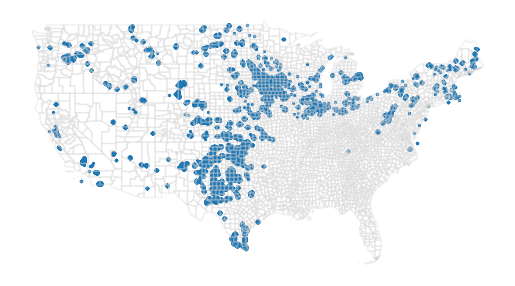

In [6]:
# now we are going to plot all turbins in the us map we have creates
axis = gdf.plot(markersize=2)

usa_map.plot(facecolor='none', edgecolor='lightgray', ax=axis, alpha=0.3)

axis.set_axis_off()

plt.show()

<Figure size 1600x1400 with 0 Axes>

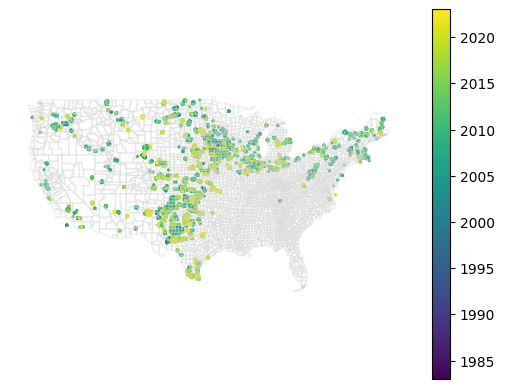

In [7]:
# Increase plot size
plt.figure(figsize=(16, 14))

# same as above but by year
# now we are going to plot all turbins in the us map we have creates
axis = gdf.plot('p_year', markersize=2, legend=True)

usa_map.plot(facecolor='none', edgecolor='lightgray', ax=axis, alpha=0.3)

axis.set_axis_off()

plt.show()


<Figure size 1600x1400 with 0 Axes>

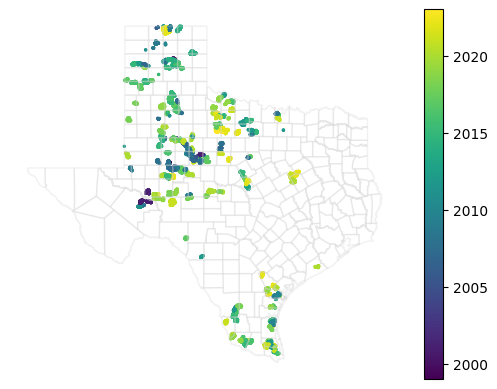

In [8]:
# lets test only doing texas
tejas_map = usa_map[usa_map['STATEFP'] == '48']
tejas_gdf = gdf[gdf['t_state'] == 'TX']

# Increase plot size
plt.figure(figsize=(16, 14))

# same as above but by year
# now we are going to plot all turbins in the us map we have creates
axis = tejas_gdf.plot('p_year', markersize=2, legend=True)

tejas_map.plot(facecolor='none', edgecolor='lightgray', ax=axis, alpha=0.3)

axis.set_axis_off()

plt.show()

In [9]:
# choosing how many rows to show
n_rows = 10

# listing the frequency of values by states and manufacturer
ct_by_manu = gdf['t_manu'].value_counts()
ct_by_state = gdf['t_state'].value_counts()

print(ct_by_manu[:n_rows], '\n')
print(ct_by_state[:n_rows])



t_manu
GE Wind                            32625
Vestas                             16990
Siemens                             5082
Gamesa                              3037
Mitsubishi                          2363
Siemens Gamesa Renewable Energy     2246
Nordex                              1822
Suzlon                              1316
Acciona                              758
REpower                              562
Name: count, dtype: int64 

t_state
TX    18323
IA     6281
OK     5343
KS     3925
IL     3550
CA     3471
CO     2825
MN     2697
OR     2113
ND     2085
Name: count, dtype: int64


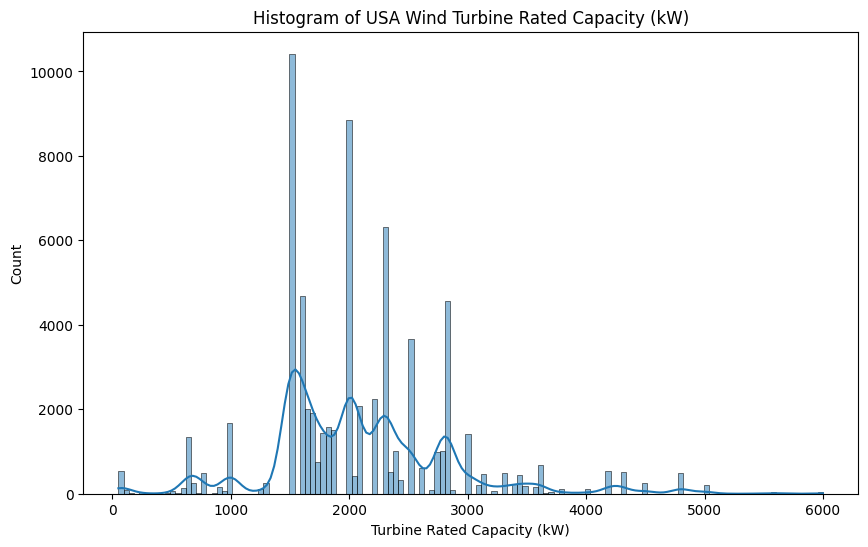

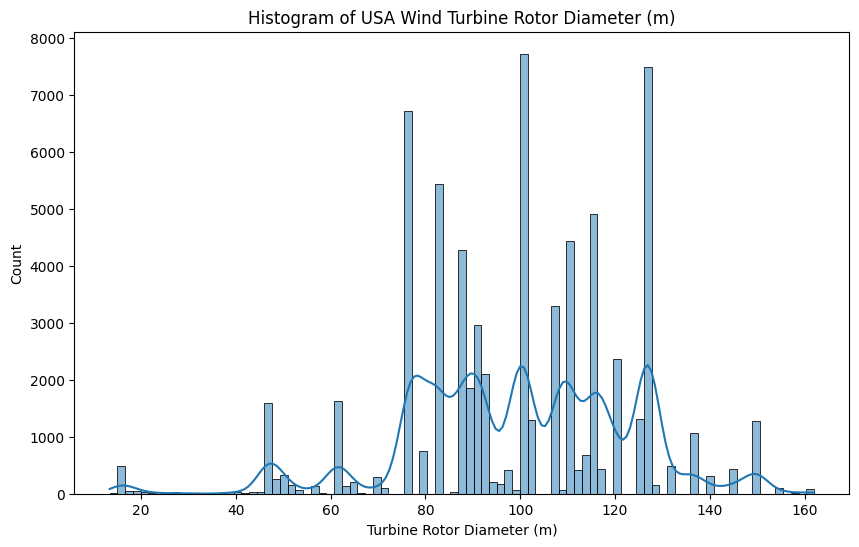

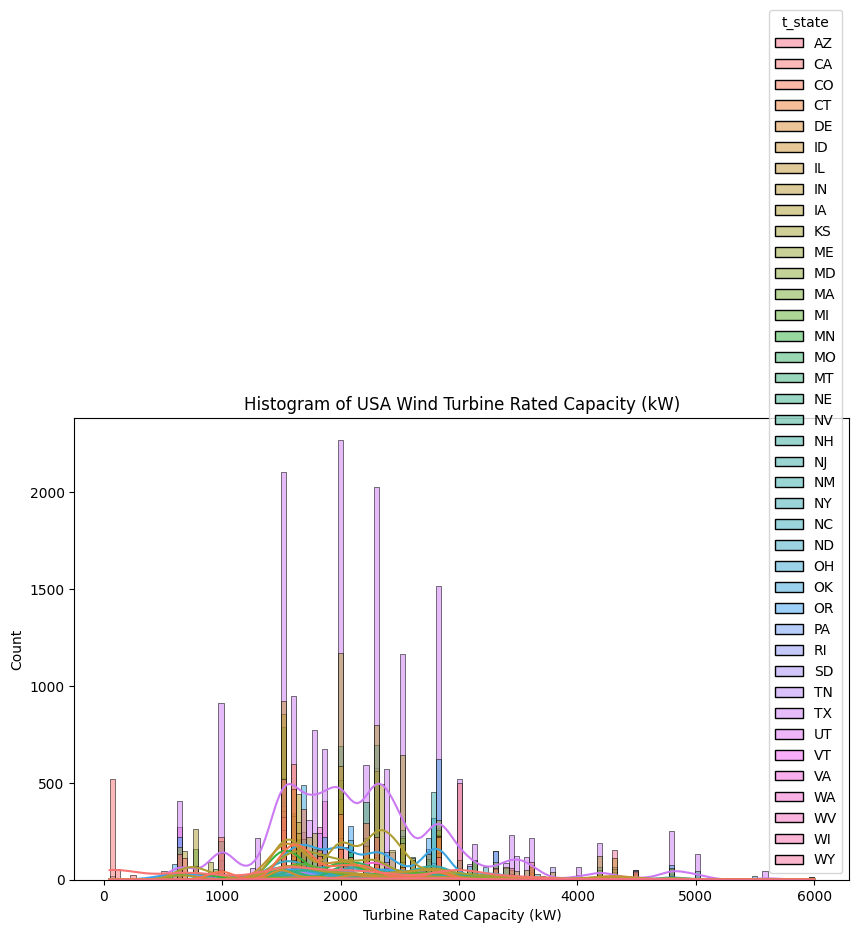

In [11]:
def histplot_it(gdf, x_value, figw=10, figh=6, hue_by=None):
    '''
    purpose is to apply histplot to data depending on what user wants
    '''
    fig = plt.figure()
    fig.set_figwidth(figw)
    fig.set_figheight(figh)

    # now we will apply depending on x
    sns.histplot(data=gdf, x=x_value, kde=True, hue=hue_by)

    # now giving our plot some pretty visuals
    if x_value == 't_rd':
        plt.title(f'Histogram of USA Wind Turbine Rotor Diameter (m)')
        plt.xlabel('Turbine Rotor Diameter (m)')
    
    elif x_value == 't_cap':
        plt.title(f'Histogram of USA Wind Turbine Rated Capacity (kW)')
        plt.xlabel('Turbine Rated Capacity (kW)')
    
    else:
        print('No pretty stuff for params you provided!')

    plt.show()
    

histplot_it(gdf, x_value='t_cap')
histplot_it(gdf, x_value='t_rd')
histplot_it(gdf, x_value='t_cap', hue_by='t_state')



you can find help on this here
https://michaelminn.net/tutorials/python-points/index.html

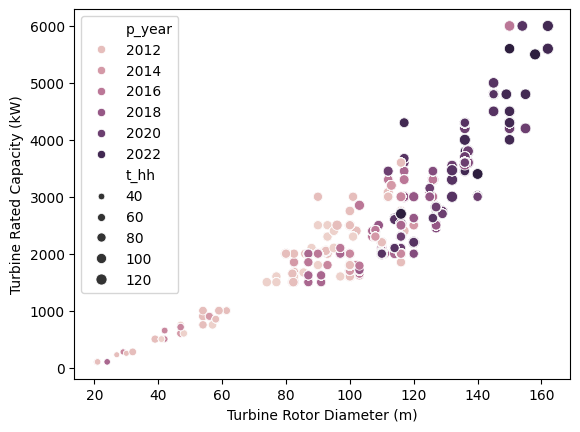

In [12]:
# creating a scatter plot to assess relationship between nameplate capacity and turbine diameter
sns.scatterplot(data=gdf[gdf['p_year'] > 2010], x='t_rd', y='t_cap', hue='p_year', size='t_hh')

plt.xlabel('Turbine Rotor Diameter (m)')
plt.ylabel('Turbine Rated Capacity (kW)')

plt.show()

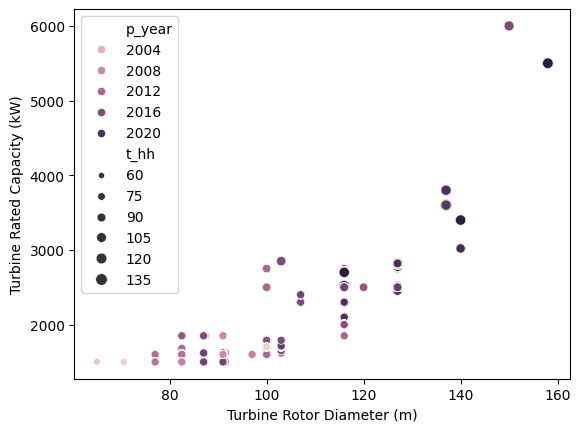

In [13]:
# creating a scatter plot to assess relationship between nameplate capacity and turbine diameter
sns.scatterplot(data=gdf[gdf['t_manu'] == 'GE Wind'], x='t_rd', y='t_cap', hue='p_year', size='t_hh')

plt.xlabel('Turbine Rotor Diameter (m)')
plt.ylabel('Turbine Rated Capacity (kW)')

plt.show()

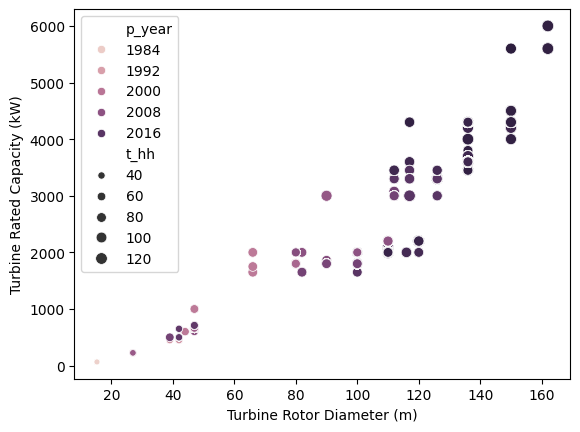

In [14]:
# creating a scatter plot to assess relationship between nameplate capacity and turbine diameter
sns.scatterplot(data=gdf[gdf['t_manu'] == 'Vestas'], x='t_rd', y='t_cap', hue='p_year', size='t_hh')

plt.xlabel('Turbine Rotor Diameter (m)')
plt.ylabel('Turbine Rated Capacity (kW)')

plt.show()

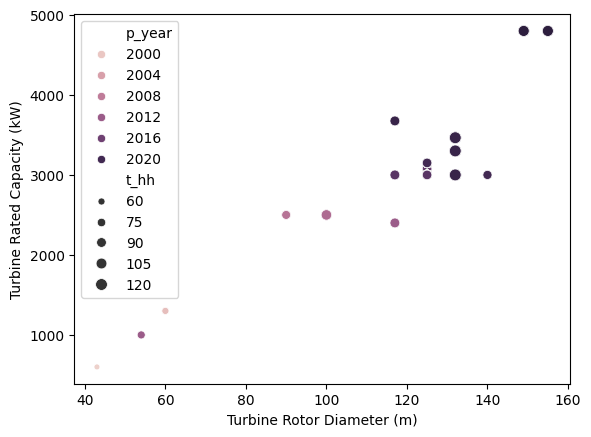

In [15]:
# creating a scatter plot to assess relationship between nameplate capacity and turbine diameter
sns.scatterplot(data=gdf[gdf['t_manu'] == 'Nordex'], x='t_rd', y='t_cap', hue='p_year', size='t_hh')

plt.xlabel('Turbine Rotor Diameter (m)')
plt.ylabel('Turbine Rated Capacity (kW)')

plt.show()